In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from litellm.types.utils import *
import transformers

chat_tokenizer_dir = "deepseek_v3_tokenizer/deepseek_v3_tokenizer"

tokenizer = transformers.AutoTokenizer.from_pretrained(
    chat_tokenizer_dir, trust_remote_code=True
)

c:\Users\mikad\Documents\GitHub\FinGT\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
from src.flame.code.prompts_oldflame import subjectiveqa_prompt
from datasets import load_dataset

definition_map = {
    "RELEVANT": "The speaker has answered the question entirely and appropriately.",
    "SPECIFIC": "The speaker includes specific and technical details in the answer.",
    "CAUTIOUS": "The speaker answers using a more conservative, risk-averse approach.",
    "ASSERTIVE": "The speaker answers with certainty about the company's events.",
    "CLEAR": "The speaker is transparent in the answer and about the message to be conveyed.",
    "OPTIMISTIC": "The speaker answers with a positive tone regarding outcomes.",
}
dataset = load_dataset(
    "gtfintechlab/subjectiveqa", "5768", split="test", trust_remote_code=True
)

In [9]:
questions = [row["QUESTION"] for row in dataset]  # type: ignore
answers = [row["ANSWER"] for row in dataset]  # type: ignore

tokens = []

for q, a in zip(questions, answers):
    for feature in definition_map.keys():
        count = 0
        count += len(tokenizer.encode("You are an expert sentence classifier."))
        count += len(
            tokenizer.encode(
                subjectiveqa_prompt(feature, definition_map[feature], q, a)
            )
        )
        tokens.append(count)

print(sum(tokens))

1295289


In [37]:

token_costs = {
    "together_ai/meta-llama/Llama-3-70b-chat-hf": {"input": 0.90, "output": 0.90},
    "together_ai/meta-llama/Llama-3-8b-chat-hf": {"input": 0.20, "output": 0.20},
    "together_ai/databricks/dbrx-instruct": {"input": 1.20, "output": 1.20},
    "together_ai/deepseek-ai/deepseek-llm-67b-chat": {"input": 0.90, "output": 0.90},
    "together_ai/google/gemma-2-27b-it": {"input": 0.80, "output": 0.80},
    "together_ai/google/gemma-2-9b-it": {"input": 0.30, "output": 0.30},
    "together_ai/mistralai/Mistral-7B-Instruct-v0.3": {"input": 0.20, "output": 0.20},
    "together_ai/mistralai/Mixtral-8x22B-Instruct-v0.1": {
        "input": 1.20,
        "output": 1.20,
    },
    "together_ai/mistralai/Mixtral-8x7B-Instruct-v0.1": {"input": 0.60, "output": 0.60},
    "together_ai/Qwen/Qwen2-72B-Instruct": {"input": 0.90, "output": 0.90},
    "together_ai/microsoft/WizardLM-2-8x22B": {"input": 1.20, "output": 1.20},
    "together_ai/deepseek-ai/DeepSeek-V3": {"input": 1.25, "output": 1.25},
    "together_ai/deepseek-ai/DeepSeek-r1": {"input": 7.00, "output": 7.00},
    "together_ai/Qwen/QwQ-32B-Preview": {"input": 1.20, "output": 1.20},
    "ai21/jamba-1.5-mini": {"input": 0.2, "output": 0.4},
    "ai21/jamba-1.5-large": {"input": 2, "output": 8},
    "anthropic/claude-3-5-sonnet-20240620": {"input": 3, "output": 15},
    "anthropic/claude-3-haiku-20240307": {"input": 0.25, "output": 1.25},
    "cohere_chat/command-r7b-12-2024": {"input": 0.0375, "output": 0.15},
    "cohere_chat/command-r-plus-08-2024": {"input": 2.5, "output": 10},
    "gemini/gemini-1.5-pro-latest": {"input": 1.25, "output": 5.0},
    "openai/gpt-4o-2024-08-06": {"input": 2.5, "output": 10},
    "openai/o1-mini": {"input": 1.1, "output": 4.4},
}

prices = pd.read_csv("prices.csv")

prices.index = token_costs.keys()
prices.drop(columns=["Unnamed: 0"], inplace=True)

prices["subjective_qa"] = [
    (1295289 * token_costs[model]["input"] + 12 * token_costs[model]["output"]) / 1e6
    for model in token_costs.keys()
]

In [36]:
prices = pd.read_csv("prices.csv")

In [32]:
prices.drop(columns=["Unnamed: 0"], inplace=True)

In [38]:
prices

,fomc,fpb,finqa,fiqa_task1,fiqa_task2,headlines,finbench,finred,refind,edtsum,...,causal_classification,ectsum,finentity,finer,fnxl,numclaim,tatqa,convfinqa,sum,subjective_qa
together_ai/meta-llama/Llama-3-70b-chat-hf,0.100182,0.110136,1.137640,0.055822,0.719536,0.998226,0.404255,0.383602,1.337023,1.942460,...,0.048485,1.563701,0.116050,0.329528,0.249718,0.093089,1.108273,2.960846,15.375152,1.165771
together_ai/meta-llama/Llama-3-8b-chat-hf,0.022230,0.025874,0.249421,0.012211,0.159489,0.221871,0.094404,0.090602,0.321078,0.433545,...,0.010774,0.363035,0.026439,0.077328,0.058292,0.020891,0.264303,0.688836,3.531856,0.259060
together_ai/databricks/dbrx-instruct,0.143842,0.165760,1.503822,0.064680,0.948184,1.291927,0.558044,0.572788,2.049124,2.930813,...,0.095383,2.450983,0.172393,0.468847,0.339445,0.131495,1.473914,4.189325,21.795899,1.554361
together_ai/deepseek-ai/deepseek-llm-67b-chat,0.104096,0.121154,1.249161,0.050666,0.755161,0.873902,0.424718,0.366441,1.445444,1.849760,...,0.049467,0.834004,0.128774,0.344256,0.236810,0.093660,1.195580,3.171877,15.408179,1.165771
together_ai/google/gemma-2-27b-it,0.079443,0.091412,1.053345,0.048794,0.656976,0.907413,0.304495,0.341618,1.365566,1.747698,...,0.043678,1.462966,0.105720,0.299215,0.205862,0.076678,0.995216,2.844795,14.463309,1.036241
together_ai/google/gemma-2-9b-it,0.030042,0.034164,0.399641,0.018470,0.244722,0.333904,0.117964,0.135844,0.514836,0.655066,...,0.016347,0.000000,0.040628,0.113304,0.082594,0.028171,0.372147,1.076747,4.900278,0.388590
together_ai/mistralai/Mistral-7B-Instruct-v0.3,0.025772,0.028950,0.284800,0.012248,0.175459,0.241885,0.101002,0.089753,0.358902,0.573780,...,0.011857,0.448284,0.031569,0.075554,0.063430,0.023623,0.271472,0.782551,4.100980,0.259060
together_ai/mistralai/Mixtral-8x22B-Instruct-v0.1,0.140678,0.166399,1.798825,0.074855,1.049910,1.444514,0.581370,0.561644,2.040164,3.421298,...,0.071388,2.657688,0.184127,0.476144,0.353491,0.135275,1.733140,4.901839,24.795965,1.554361
together_ai/mistralai/Mixtral-8x7B-Instruct-v0.1,0.076852,0.086711,0.878076,0.036328,0.531434,0.695651,0.302351,0.301669,1.073401,1.719700,...,0.053003,1.296393,0.092770,0.240455,0.199241,0.068917,0.872852,2.553460,12.637384,0.777181
together_ai/Qwen/Qwen2-72B-Instruct,0.103748,0.118516,1.294181,0.053441,0.741217,0.957683,0.431079,0.425120,1.435750,2.356194,...,0.053233,1.802765,0.122657,0.344086,0.235544,0.095905,1.182812,3.405384,16.852812,1.165771


In [39]:
prices.to_csv("prices.csv")

In [76]:
task = "finqa"
deepseek = pd.read_csv(
    f"results/{task}/{task}_together_ai/deepseek-ai/DeepSeek-r1_09_02_2025.csv"
)
openai = pd.read_csv(f"results/{task}/{task}_openai/o1-mini_09_02_2025.csv")
type_dict = {
    "ModelResponse": ModelResponse,
    "Choices": Choices,
    "Message": Message,
    "Usage": Usage,
    "CompletionTokensDetailsWrapper": CompletionTokensDetailsWrapper,
    "PromptTokensDetailsWrapper": PromptTokensDetailsWrapper,
}
deepseek["complete_responses"] = deepseek["complete_responses"].apply(
    lambda x: eval(x, type_dict)
)
openai["complete_responses"] = openai["complete_responses"].apply(
    lambda x: eval(x, type_dict)
)

In [77]:
deepseek.head()

,context,response,actual_label,complete_responses
0,entergy corporation and subsidiaries managemen...,"<think>\nOkay, let's tackle this question. The...",94,"ModelResponse(id='90f642272b73c9b1', created=1..."
1,item 1b . unresolved staff comments not applic...,"<think>\nOkay, let's tackle this question. The...",14%,"ModelResponse(id='90f642275ed5e5c1', created=1..."
2,undesignated hedges was $ 41.2 million and $ 4...,"<think>\nOkay, let's tackle this question. The...",9.9%,"ModelResponse(id='90f642271f692060', created=1..."
3,chairman and a director of the board of fis as...,"<think>\nOkay, let's tackle this question. The...",2.9%,"ModelResponse(id='90f64225d9be05bb', created=1..."
4,performance graph the table below compares the...,"<think>\nOkay, let's tackle this question. The...",NaN,"ModelResponse(id='90f64227297d2f18', created=1..."


In [78]:
deepseek.complete_responses[0].usage

Usage(completion_tokens=649, prompt_tokens=848, total_tokens=1497, completion_tokens_details=None, prompt_tokens_details=None)

In [79]:
deepseek.complete_responses[0].choices[0].message.content

'<think>\nOkay, let\'s tackle this question. The user is asking for the net change in net revenue during 2015 for Entergy Corporation based on the provided context. \n\nFirst, I need to locate the relevant figures in the context. The user mentioned a table under "Net revenue utility" which compares 2015 to 2014. The table lists various components contributing to the change in net revenue.\n\nLooking at the data: 2014 net revenue is $5,735 million. Then there are several line items like Retail electric price, Volume/weather, Waterford 3 provision, MISO deferral, Louisiana business combination customer credits, and Other. The sum of these items should explain the difference between 2014 and 2015 net revenues.\n\nThe 2015 net revenue is given as $5,829 million. To find the net change, I subtract the 2014 figure from the 2015 figure: $5,829M - $5,735M = $94M. \n\nBut let me double-check by adding up all the individual components listed. The components are:\n\nRetail electric price: +187\nV

In [80]:
print(len(tokenizer.encode(deepseek.complete_responses[0].choices[0].message.content)))

647


In [81]:
deepseek["tokens"] = deepseek["complete_responses"].apply(
    lambda x: x.usage.completion_tokens
)
# deepseek['tokenizer_tokens'] = deepseek['complete_responses'].apply(lambda x : len(tokenizer.encode(x.choices[0].message.content)))

# tokenizer always 2 off - probably think tokens

In [82]:
deepseek["reasoning_tokens"] = deepseek["response"].apply(
    lambda x: x[: x.find("</think>") + 9]
)
deepseek["response_tokens"] = deepseek["response"].apply(
    lambda x: x[x.find("</think>") + 9 :]
)
deepseek["reasoning_tokens"] = deepseek["reasoning_tokens"].apply(
    lambda x: len(tokenizer.encode(x)) + 1
)
deepseek["response_tokens"] = deepseek["response_tokens"].apply(
    lambda x: len(tokenizer.encode(x))
)

In [83]:
deepseek.head()

,context,response,actual_label,complete_responses,tokens,reasoning_tokens,response_tokens
0,entergy corporation and subsidiaries managemen...,"<think>\nOkay, let's tackle this question. The...",94,"ModelResponse(id='90f642272b73c9b1', created=1...",649,401,248
1,item 1b . unresolved staff comments not applic...,"<think>\nOkay, let's tackle this question. The...",14%,"ModelResponse(id='90f642275ed5e5c1', created=1...",459,345,114
2,undesignated hedges was $ 41.2 million and $ 4...,"<think>\nOkay, let's tackle this question. The...",9.9%,"ModelResponse(id='90f642271f692060', created=1...",1508,1337,171
3,chairman and a director of the board of fis as...,"<think>\nOkay, let's tackle this question. The...",2.9%,"ModelResponse(id='90f64225d9be05bb', created=1...",339,248,91
4,performance graph the table below compares the...,"<think>\nOkay, let's tackle this question. The...",NaN,"ModelResponse(id='90f64227297d2f18', created=1...",652,424,228


In [84]:
openai.complete_responses[0].usage

Usage(completion_tokens=360, prompt_tokens=834, total_tokens=1194, completion_tokens_details=CompletionTokensDetailsWrapper(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=192, rejected_prediction_tokens=0, text_tokens=None), prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=0, cached_tokens=0, text_tokens=None, image_tokens=None))

In [85]:
openai["tokens"] = openai["complete_responses"].apply(
    lambda x: x.usage.completion_tokens
)
openai["reasoning_tokens"] = openai["complete_responses"].apply(
    lambda x: x.usage.completion_tokens_details.reasoning_tokens
)
openai["response_tokens"] = openai["tokens"] - openai["reasoning_tokens"]

In [86]:
openai.head()

,context,response,actual_label,complete_responses,tokens,reasoning_tokens,response_tokens
0,entergy corporation and subsidiaries managemen...,To determine the net change in net revenue for...,94,ModelResponse(id='chatcmpl-Az7ENrXprVCGWVq3hlW...,360,192,168
1,item 1b . unresolved staff comments not applic...,To determine the percentage of total facilitie...,14%,ModelResponse(id='chatcmpl-Az7EN5B3GKe3PeOBZrM...,648,384,264
2,undesignated hedges was $ 41.2 million and $ 4...,To determine the percentage change in cash flo...,9.9%,ModelResponse(id='chatcmpl-Az7ENOzBnR3s3qOBFr5...,557,320,237
3,chairman and a director of the board of fis as...,"Based on the provided context, the total purch...",2.9%,ModelResponse(id='chatcmpl-Az7ENjdCYpw1QUdymvs...,736,576,160
4,performance graph the table below compares the...,To determine the difference in percentage cumu...,NaN,ModelResponse(id='chatcmpl-Az7ENWalrRdD5pxkT9S...,1098,768,330


In [ ]:
df = pd.DataFrame(
    [
        deepseek["reasoning_tokens"],
        deepseek["response_tokens"],
        openai["reasoning_tokens"],
        openai["response_tokens"],
    ],
    index=[
        "deepseek_reasoning_tokens",
        "deepseek_response_tokens",
        "openai_reasoning_tokens",
        "openai_response_tokens",
    ],
).T

,deepseek_reasoning_tokens,deepseek_response_tokens,openai_reasoning_tokens,openai_response_tokens
0,401,248,192,168
1,345,114,384,264
2,1337,171,320,237
3,248,91,576,160
4,424,228,768,330


In [96]:
df.describe().drop("count")

,deepseek_reasoning_tokens,deepseek_response_tokens,openai_reasoning_tokens,openai_response_tokens
mean,691.836966,157.511770,604.847428,205.549259
std,823.057888,46.695185,416.838856,68.681080
min,175.000000,32.000000,128.000000,39.000000
25%,332.500000,127.500000,320.000000,161.000000
50%,414.000000,153.000000,512.000000,200.000000
75%,607.500000,184.000000,704.000000,243.000000
max,7278.000000,338.000000,3264.000000,705.000000


In [105]:
# save mean, std, 50% for reasoning tokens
tokens = df.describe().loc[["mean", "std", "50%"]][
    ["deepseek_reasoning_tokens", "openai_reasoning_tokens"]
]

tokens

,deepseek_reasoning_tokens,openai_reasoning_tokens
mean,691.836966,604.847428
std,823.057888,416.838856
50%,414.000000,512.000000


<Axes: >

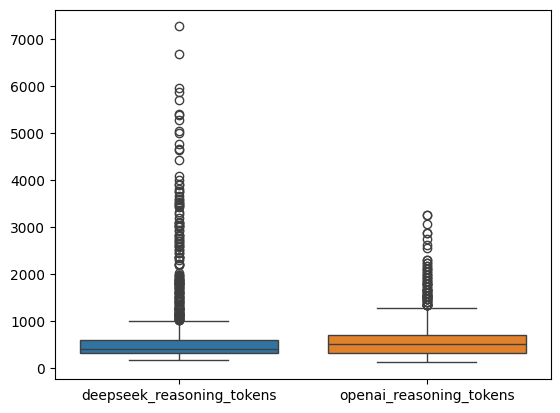

In [ ]:
sns.violinplot(data=df[["deepseek_reasoning_tokens", "openai_reasoning_tokens"]])

fomc
fpb
finqa
fiqa_task1
fiqa_task2
headlines
finbench
finred
refind
edtsum
banking77
causal_detection


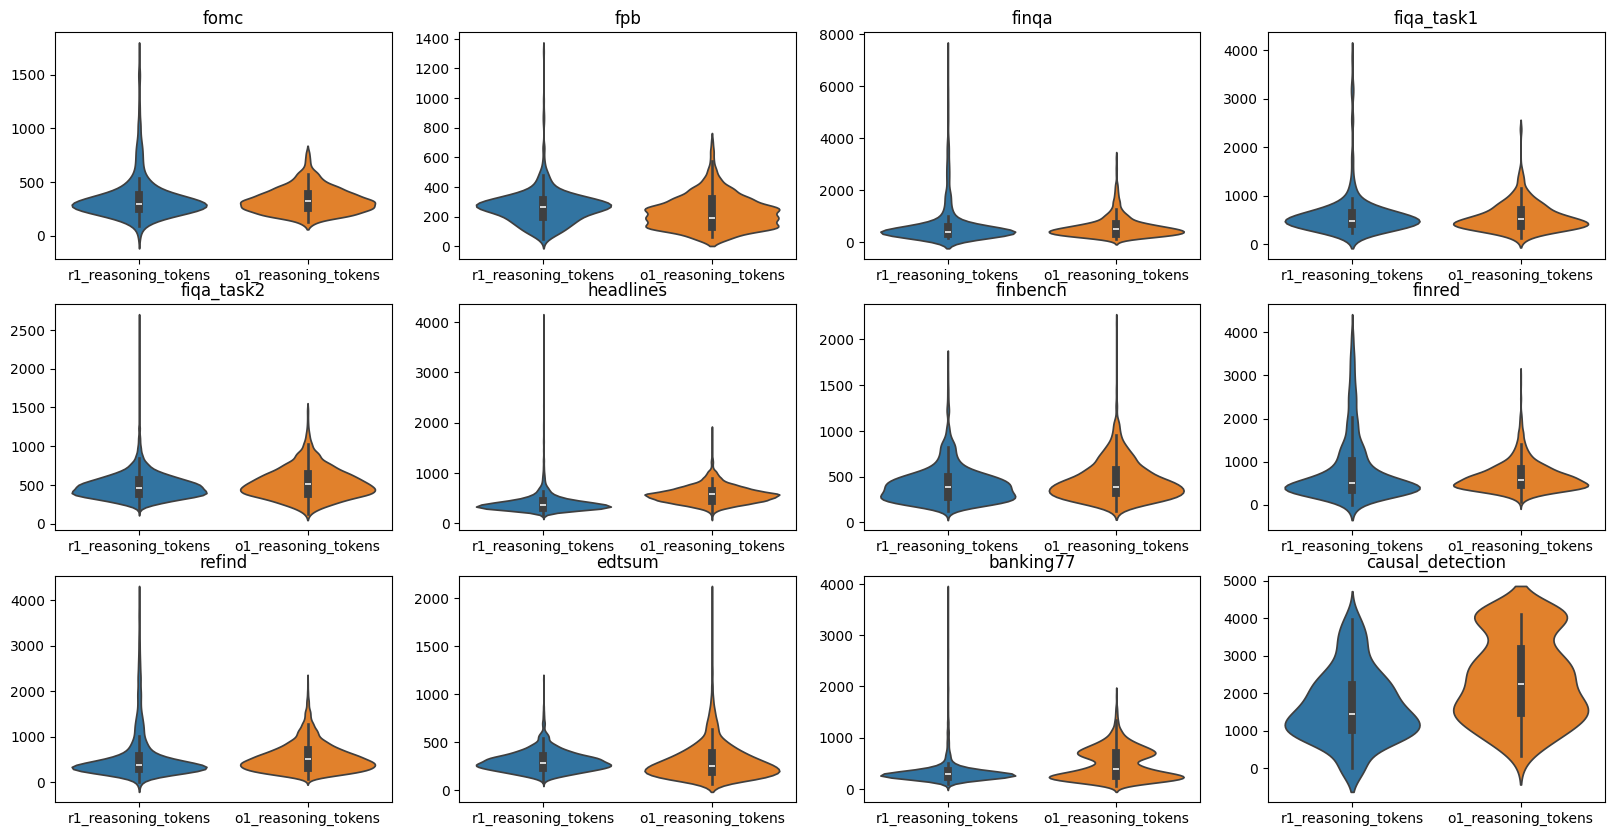

In [126]:
dfs = {}
plt.figure(figsize=(20, 10))
count = 0
for task in [
    "fomc",
    "fpb",
    "finqa",
    "fiqa_task1",
    "fiqa_task2",
    "headlines",
    "finbench",
    "finred",
    "refind",
    "edtsum",
    "banking77",
    "causal_detection",
]:
    for i in range(8, 10):
        try:
            deepseek = pd.read_csv(
                f"results/{task}/{task}_together_ai/deepseek-ai/DeepSeek-r1_0{i}_02_2025.csv"
            )
            break
        except:
            pass
    for i in range(8, 10):
        try:
            openai = pd.read_csv(
                f"results/{task}/{task}_openai/o1-mini_0{i}_02_2025.csv"
            )
            break
        except:
            pass
    type_dict = {
        "ModelResponse": ModelResponse,
        "Choices": Choices,
        "Message": Message,
        "Usage": Usage,
        "CompletionTokensDetailsWrapper": CompletionTokensDetailsWrapper,
        "PromptTokensDetailsWrapper": PromptTokensDetailsWrapper,
    }
    deepseek["complete_responses"] = deepseek["complete_responses"].apply(
        lambda x: eval(x, type_dict)
    )
    openai["complete_responses"] = openai["complete_responses"].apply(
        lambda x: eval(x, type_dict)
    )
    deepseek["response"] = deepseek["complete_responses"].apply(
        lambda x: x.choices[0].message.content
    )

    deepseek["reasoning_tokens"] = deepseek["response"].apply(
        lambda x: x[: x.find("</think>") + 9]
    )
    deepseek["response_tokens"] = deepseek["response"].apply(
        lambda x: x[x.find("</think>") + 9 :]
    )
    deepseek["reasoning_tokens"] = deepseek["reasoning_tokens"].apply(
        lambda x: len(tokenizer.encode(x)) + 1
    )
    deepseek["response_tokens"] = deepseek["response_tokens"].apply(
        lambda x: len(tokenizer.encode(x))
    )
    openai["tokens"] = openai["complete_responses"].apply(
        lambda x: x.usage.completion_tokens
    )
    openai["reasoning_tokens"] = openai["complete_responses"].apply(
        lambda x: x.usage.completion_tokens_details.reasoning_tokens
    )
    openai["response_tokens"] = openai["tokens"] - openai["reasoning_tokens"]

    df = pd.DataFrame(
        [
            deepseek["reasoning_tokens"],
            deepseek["response_tokens"],
            openai["reasoning_tokens"],
            openai["response_tokens"],
        ],
        index=[
            "r1_reasoning_tokens",
            "r1_response_tokens",
            "o1_reasoning_tokens",
            "o1_response_tokens",
        ],
    ).T

    plt.subplot(3, 4, count + 1)
    sns.violinplot(data=df[["r1_reasoning_tokens", "o1_reasoning_tokens"]])
    plt.title(task)

    tokens_task = df.describe().loc[["mean", "50%", "std"]][
        ["r1_reasoning_tokens", "o1_reasoning_tokens"]
    ]

    dfs[task] = tokens_task
    print(task)
    count += 1

df = pd.concat(dfs, axis=1)
plt.show()

In [127]:
df = pd.concat(dfs, axis=1).T
df

mean     50%          std
fomc             r1_reasoning_tokens   352.439516   298.0   208.640933
                 o1_reasoning_tokens   333.161290   320.0   119.405151
fpb              r1_reasoning_tokens   267.670588   266.0   115.007038
                 o1_reasoning_tokens   232.658824   192.0   111.463215
finqa            r1_reasoning_tokens   691.836966   414.0   823.057888
                 o1_reasoning_tokens   604.847428   512.0   416.838856
fiqa_task1       r1_reasoning_tokens   611.447826   488.5   469.597100
                 o1_reasoning_tokens   563.200000   512.0   286.990565
fiqa_task2       r1_reasoning_tokens   488.625537   465.0   170.505606
                 o1_reasoning_tokens   526.669270   512.0   198.500198
headlines        r1_reasoning_tokens   408.983937   364.0   209.829734
                 o1_reasoning_tokens   575.308411   576.0   172.636948
finbench         r1_reasoning_tokens   415.147126   381.0   198.033150
                 o1_reasoning_tokens   453.786973   384.0   207.756953
finred           r1_reasoning_tokens   823.722446   493.5   771.889967
                 o1_reasoning_tokens   654.666667   576.0   339.293473
refind           r1_reasoning_tokens   579.463256   371.0   574.292061
                 o1_reasoning_tokens   551.516279   512.0   315.871490
edtsum           r1_reasoning_tokens   304.347500   287.0   107.435557
                 o1_reasoning_tokens   304.128000   256.0   187.015462
banking77        r1_reasoning_tokens   346.656494   285.0   276.237016
                 o1_reasoning_tokens   492.405195   384.0   300.753942
causal_detection r1_reasoning_tokens  1645.460177  1445.0   944.712533
                 o1_reasoning_tokens  2369.150442  2240.0  1123.591921

In [169]:
token_costs = {
    "together_ai/meta-llama/Llama-3-70b-chat-hf": {"input": 0.90, "output": 0.90},
    "together_ai/meta-llama/Llama-3-8b-chat-hf": {"input": 0.20, "output": 0.20},
    "together_ai/databricks/dbrx-instruct": {"input": 1.20, "output": 1.20},
    "together_ai/deepseek-ai/deepseek-llm-67b-chat": {"input": 0.90, "output": 0.90},
    "together_ai/google/gemma-2-27b-it": {"input": 0.80, "output": 0.80},
    "together_ai/google/gemma-2-9b-it": {"input": 0.30, "output": 0.30},
    "together_ai/mistralai/Mistral-7B-Instruct-v0.3": {"input": 0.20, "output": 0.20},
    "together_ai/mistralai/Mixtral-8x22B-Instruct-v0.1": {
        "input": 1.20,
        "output": 1.20,
    },
    "together_ai/mistralai/Mixtral-8x7B-Instruct-v0.1": {"input": 0.60, "output": 0.60},
    "together_ai/Qwen/Qwen2-72B-Instruct": {"input": 0.90, "output": 0.90},
    "together_ai/microsoft/WizardLM-2-8x22B": {"input": 1.20, "output": 1.20},
    "together_ai/deepseek-ai/DeepSeek-V3": {"input": 1.25, "output": 1.25},
    "together_ai/deepseek-ai/DeepSeek-r1": {"input": 7.00, "output": 7.00},
    "together_ai/Qwen/QwQ-32B-Preview": {"input": 1.20, "output": 1.20},
    "ai21/jamba-1.5-mini": {"input": 0.2, "output": 0.4},
    "ai21/jamba-1.5-large": {"input": 2, "output": 8},
    "anthropic/claude-3-5-sonnet-20240620": {"input": 3, "output": 15},
    "anthropic/claude-3-haiku-20240307": {"input": 0.25, "output": 1.25},
    "cohere_chat/command-r7b-12-2024": {"input": 0.0375, "output": 0.15},
    "cohere_chat/command-r-plus-08-2024": {"input": 2.5, "output": 10},
    "gemini/gemini-1.5-pro-latest": {"input": 1.25, "output": 5.0},
    "openai/gpt-4o-2024-08-06": {"input": 2.5, "output": 10},
    "openai/o1-mini": {"input": 1.1, "output": 4.4},
}

In [2]:
import pandas as pd

token_costs = {
    "together_ai/meta-llama/Llama-3-70b-chat-hf": {"input": 0.90, "output": 0.90},
    "together_ai/meta-llama/Llama-3-8b-chat-hf": {"input": 0.20, "output": 0.20},
    "together_ai/databricks/dbrx-instruct": {"input": 1.20, "output": 1.20},
    "together_ai/deepseek-ai/deepseek-llm-67b-chat": {"input": 0.90, "output": 0.90},
    "together_ai/google/gemma-2-27b-it": {"input": 0.80, "output": 0.80},
    "together_ai/google/gemma-2-9b-it": {"input": 0.30, "output": 0.30},
    "together_ai/mistralai/Mistral-7B-Instruct-v0.3": {"input": 0.20, "output": 0.20},
    "together_ai/mistralai/Mixtral-8x22B-Instruct-v0.1": {
        "input": 1.20,
        "output": 1.20,
    },
    "together_ai/mistralai/Mixtral-8x7B-Instruct-v0.1": {"input": 0.60, "output": 0.60},
    "together_ai/Qwen/Qwen2-72B-Instruct": {"input": 0.90, "output": 0.90},
    "together_ai/microsoft/WizardLM-2-8x22B": {"input": 1.20, "output": 1.20},
    "together_ai/deepseek-ai/DeepSeek-V3": {"input": 1.25, "output": 1.25},
    "together_ai/deepseek-ai/DeepSeek-r1": {"input": 7.00, "output": 7.00},
    "together_ai/Qwen/QwQ-32B-Preview": {"input": 1.20, "output": 1.20},
    "ai21/jamba-1.5-mini": {"input": 0.2, "output": 0.4},
    "ai21/jamba-1.5-large": {"input": 2, "output": 8},
    "anthropic/claude-3-5-sonnet-20240620": {"input": 3, "output": 15},
    "anthropic/claude-3-haiku-20240307": {"input": 0.25, "output": 1.25},
    "cohere_chat/command-r7b-12-2024": {"input": 0.0375, "output": 0.15},
    "cohere_chat/command-r-plus-08-2024": {"input": 2.5, "output": 10},
    "gemini/gemini-1.5-pro-latest": {"input": 1.25, "output": 5.0},
    "openai/gpt-4o-2024-08-06": {"input": 2.5, "output": 10},
    "openai/o1-mini": {"input": 1.1, "output": 4.4},
}

import glob
from datetime import datetime
from litellm.types.utils import *


def get_files(task, model):
    files = glob.glob(f"results/{task}/{task}_{model}*.csv")
    print(files)
    print(f"results/{task}/{task}_{model}")

    latest_file = None
    latest_date = None

    for file in files:
        file = file.replace("\\", "/")
        date = file[
            len(f"results/{task}/{task}_{model}") + 1 : len(
                f"results/{task}/{task}_{model}"
            )
            + 11
        ]
        date = datetime.strptime(date, "%d_%m_%Y")
        if latest_date is None or date > latest_date:
            latest_date = date
            latest_file = file

    return latest_file


def extract_response(x):
    type_dict = {
        "ModelResponse": ModelResponse,
        "Choices": Choices,
        "Message": Message,
        "Usage": Usage,
        "CompletionTokensDetailsWrapper": CompletionTokensDetailsWrapper,
        "PromptTokensDetailsWrapper": PromptTokensDetailsWrapper,
    }
    try:
        return eval(x, type_dict)
    except Exception:
        return None


def extract_price(task, model):
    file = get_files(task, model)
    df = pd.read_csv(file)  # type: ignore
    try:
        df["complete_responses"] = df["complete_responses"].apply(
            lambda x: extract_response(x)
        )
        df["output_tokens"] = df["complete_responses"].apply(
            lambda x: x.usage.completion_tokens if x is not None else 0
        )
        df["input_tokens"] = df["complete_responses"].apply(
            lambda x: x.usage.prompt_tokens if x is not None else 0
        )
    except Exception as e:
        print(f"Error in {task} {model}")
        print(e)
        return 0
    df["price"] = (
        token_costs[model]["input"] * df["input_tokens"]
        + token_costs[model]["output"] * df["output_tokens"]
    ) / 1e6

    return sum(df["price"])


# prices = pd.DataFrame(index = token_costs.keys())
# for task in ['fomc', 'fpb', 'finqa', 'fiqa_task1', 'fiqa_task2', 'headlines', 'finbench', 'finred', 'refind', 'edtsum', 'banking77', 'causal_detection']:
#     prices[task] = [extract_price(task, model) for model in token_costs.keys()]

# prices['sum'] = prices.sum(axis=1)

# prices

In [ ]:
for model in token_costs.keys():
    try:
        print(extract_price("finer", model))
        print(model)
    except:
        pass

8.336139000000003
together_ai/deepseek-ai/DeepSeek-r1
0.8705262500000004
gemini/gemini-1.5-pro-latest
5.247334400000005
openai/o1-mini


In [3]:
extract_price("convfinqa", "together_ai/deepseek-ai/deepseek-llm-67b-chat")

['results/convfinqa/convfinqa_together_ai/deepseek-ai\\deepseek-llm-67b-chat_14_02_2025.csv']
results/convfinqa/convfinqa_together_ai/deepseek-ai/deepseek-llm-67b-chat


3.171877199999993

In [5]:
extract_price("ectsum", "together_ai/google/gemma-2-9b-it")

['results/ectsum/ectsum_together_ai/google\\gemma-2-9b-it_08_02_2025.csv']
results/ectsum/ectsum_together_ai/google/gemma-2-9b-it


0.0

In [264]:
prices = prices.drop(columns=["sum"])

In [265]:
other_prices = pd.read_csv("prices.csv")
other_prices.index = prices.index
other_prices.drop(columns=["Unnamed: 0"], inplace=True)
other_prices

,causal_classification,ectsum,finentity,finer,fnxl,numclaim,tatqa,convfinqa
together_ai/meta-llama/Llama-3-70b-chat-hf,0.048485,1.563701,0.116050,0.329528,0.249718,0.093089,1.108273,2.960846
together_ai/meta-llama/Llama-3-8b-chat-hf,0.010774,0.363035,0.026439,0.077328,0.058292,0.020891,0.264303,0.688836
together_ai/databricks/dbrx-instruct,0.095383,2.450983,0.172393,0.468847,0.339445,0.131495,1.473914,4.189325
together_ai/deepseek-ai/deepseek-llm-67b-chat,0.049467,0.834004,0.128774,0.344256,0.236810,0.093660,1.195580,0.000000
together_ai/google/gemma-2-27b-it,0.043678,1.462966,0.105720,0.299215,0.205862,0.076678,0.995216,2.844795
together_ai/google/gemma-2-9b-it,0.016347,0.000000,0.040628,0.113304,0.082594,0.028171,0.372147,1.076747
together_ai/mistralai/Mistral-7B-Instruct-v0.3,0.011857,0.448284,0.031569,0.075554,0.063430,0.023623,0.271472,0.782551
together_ai/mistralai/Mixtral-8x22B-Instruct-v0.1,0.071388,2.657688,0.184127,0.476144,0.353491,0.135275,1.733140,4.901839
together_ai/mistralai/Mixtral-8x7B-Instruct-v0.1,0.053003,1.296393,0.092770,0.240455,0.199241,0.068917,0.872852,2.553460
together_ai/Qwen/Qwen2-72B-Instruct,0.053233,1.802765,0.122657,0.344086,0.235544,0.095905,1.182812,3.405384


In [273]:
full.loc["together_ai/deepseek-ai/DeepSeek-r1", "finer"] = 8.336139000000003
full.loc["gemini/gemini-1.5-pro-latest", "finer"] = 0.8705262500000004

In [274]:
full["sum"] = full.sum(axis=1)
full

,fomc,fpb,finqa,fiqa_task1,fiqa_task2,headlines,finbench,finred,refind,edtsum,...,causal_detection,causal_classification,ectsum,finentity,finer,fnxl,numclaim,tatqa,convfinqa,sum
together_ai/meta-llama/Llama-3-70b-chat-hf,0.100182,0.110136,1.137640,0.055823,0.719536,0.998226,0.404255,0.383602,1.337023,1.942460,...,0.073321,0.048485,1.563701,0.116050,0.329528,0.249718,0.093089,1.108273,2.960846,15.375152
together_ai/meta-llama/Llama-3-8b-chat-hf,0.022230,0.025874,0.249421,0.012211,0.159489,0.221871,0.094404,0.090602,0.321078,0.433545,...,0.017755,0.010774,0.363035,0.026439,0.077328,0.058292,0.020891,0.264303,0.688836,3.531856
together_ai/databricks/dbrx-instruct,0.143842,0.165760,1.503822,0.064680,0.948184,1.291927,0.558044,0.572788,2.049124,2.930813,...,0.105618,0.095383,2.450983,0.172393,0.468847,0.339445,0.131495,1.473914,4.189325,21.795899
together_ai/deepseek-ai/deepseek-llm-67b-chat,0.104096,0.121154,1.249161,0.050666,0.755161,0.873902,0.424718,0.366441,1.445444,1.849760,...,0.083468,0.049467,0.834004,0.128774,0.344256,0.236810,0.093660,1.195580,0.000000,12.236302
together_ai/google/gemma-2-27b-it,0.079443,0.091412,1.053345,0.048794,0.656976,0.907413,0.304495,0.341618,1.365566,1.747698,...,0.065172,0.043678,1.462966,0.105720,0.299215,0.205862,0.076678,0.995216,2.844795,14.463309
together_ai/google/gemma-2-9b-it,0.030042,0.034164,0.399641,0.018470,0.244722,0.333904,0.117964,0.135844,0.514836,0.655066,...,0.026282,0.016347,0.000000,0.040628,0.113304,0.082594,0.028171,0.372147,1.076747,4.900278
together_ai/mistralai/Mistral-7B-Instruct-v0.3,0.025772,0.028950,0.284800,0.012248,0.175459,0.241885,0.101002,0.089753,0.358902,0.573780,...,0.018566,0.011857,0.448284,0.031569,0.075554,0.063430,0.023623,0.271472,0.782551,4.100980
together_ai/mistralai/Mixtral-8x22B-Instruct-v0.1,0.140678,0.166399,1.798825,0.074855,1.049910,1.444514,0.581370,0.561644,2.040164,3.421298,...,0.109969,0.071388,2.657688,0.184127,0.476144,0.353491,0.135275,1.733140,4.901839,24.795965
together_ai/mistralai/Mixtral-8x7B-Instruct-v0.1,0.076852,0.086711,0.878076,0.036328,0.531434,0.695651,0.302351,0.301669,1.073401,1.719700,...,0.055978,0.053003,1.296393,0.092770,0.240455,0.199241,0.068917,0.872852,2.553460,12.637384
together_ai/Qwen/Qwen2-72B-Instruct,0.103748,0.118517,1.294181,0.053441,0.741217,0.957683,0.431079,0.425120,1.435750,2.356194,...,0.080762,0.053233,1.802765,0.122657,0.344086,0.235544,0.095905,1.182812,3.405384,16.852812


In [284]:
full.describe().loc[["min"]].T

,min
fomc,0.007526
fpb,0.008575
finqa,0.077685
fiqa_task1,0.004830
fiqa_task2,0.065694
headlines,0.088938
finbench,0.035983
finred,0.027849
refind,0.105803
edtsum,0.106669


In [285]:
full.to_csv("prices.csv")

In [286]:
full["sum"].T

together_ai/meta-llama/Llama-3-70b-chat-hf            15.375152
together_ai/meta-llama/Llama-3-8b-chat-hf              3.531856
together_ai/databricks/dbrx-instruct                  21.795899
together_ai/deepseek-ai/deepseek-llm-67b-chat         12.236302
together_ai/google/gemma-2-27b-it                     14.463309
together_ai/google/gemma-2-9b-it                       4.900278
together_ai/mistralai/Mistral-7B-Instruct-v0.3         4.100980
together_ai/mistralai/Mixtral-8x22B-Instruct-v0.1     24.795965
together_ai/mistralai/Mixtral-8x7B-Instruct-v0.1      12.637384
together_ai/Qwen/Qwen2-72B-Instruct                   16.852812
together_ai/microsoft/WizardLM-2-8x22B                26.313119
together_ai/deepseek-ai/DeepSeek-V3                   22.415194
together_ai/deepseek-ai/DeepSeek-r1                  254.091726
together_ai/Qwen/QwQ-32B-Preview                      28.877832
ai21/jamba-1.5-mini                                    4.213290
ai21/jamba-1.5-large                    

In [272]:
full = pd.concat([prices, other_prices], axis=1)
# full['sum'] = full.sum(axis=1)
full

,fomc,fpb,finqa,fiqa_task1,fiqa_task2,headlines,finbench,finred,refind,edtsum,banking77,causal_detection,causal_classification,ectsum,finentity,finer,fnxl,numclaim,tatqa,convfinqa
together_ai/meta-llama/Llama-3-70b-chat-hf,0.100182,0.110136,1.137640,0.055823,0.719536,0.998226,0.404255,0.383602,1.337023,1.942460,1.643260,0.073321,0.048485,1.563701,0.116050,0.329528,0.249718,0.093089,1.108273,2.960846
together_ai/meta-llama/Llama-3-8b-chat-hf,0.022230,0.025874,0.249421,0.012211,0.159489,0.221871,0.094404,0.090602,0.321078,0.433545,0.373479,0.017755,0.010774,0.363035,0.026439,0.077328,0.058292,0.020891,0.264303,0.688836
together_ai/databricks/dbrx-instruct,0.143842,0.165760,1.503822,0.064680,0.948184,1.291927,0.558044,0.572788,2.049124,2.930813,2.139512,0.105618,0.095383,2.450983,0.172393,0.468847,0.339445,0.131495,1.473914,4.189325
together_ai/deepseek-ai/deepseek-llm-67b-chat,0.104096,0.121154,1.249161,0.050666,0.755161,0.873902,0.424718,0.366441,1.445444,1.849760,2.029779,0.083468,0.049467,0.834004,0.128774,0.344256,0.236810,0.093660,1.195580,0.000000
together_ai/google/gemma-2-27b-it,0.079443,0.091412,1.053345,0.048794,0.656976,0.907413,0.304495,0.341618,1.365566,1.747698,1.767247,0.065172,0.043678,1.462966,0.105720,0.299215,0.205862,0.076678,0.995216,2.844795
together_ai/google/gemma-2-9b-it,0.030042,0.034164,0.399641,0.018470,0.244722,0.333904,0.117964,0.135844,0.514836,0.655066,0.659404,0.026282,0.016347,0.000000,0.040628,0.113304,0.082594,0.028171,0.372147,1.076747
together_ai/mistralai/Mistral-7B-Instruct-v0.3,0.025772,0.028950,0.284800,0.012248,0.175459,0.241885,0.101002,0.089753,0.358902,0.573780,0.481523,0.018566,0.011857,0.448284,0.031569,0.075554,0.063430,0.023623,0.271472,0.782551
together_ai/mistralai/Mixtral-8x22B-Instruct-v0.1,0.140678,0.166399,1.798825,0.074855,1.049910,1.444514,0.581370,0.561644,2.040164,3.421298,2.893244,0.109969,0.071388,2.657688,0.184127,0.476144,0.353491,0.135275,1.733140,4.901839
together_ai/mistralai/Mixtral-8x7B-Instruct-v0.1,0.076852,0.086711,0.878076,0.036328,0.531434,0.695651,0.302351,0.301669,1.073401,1.719700,1.502141,0.055978,0.053003,1.296393,0.092770,0.240455,0.199241,0.068917,0.872852,2.553460
together_ai/Qwen/Qwen2-72B-Instruct,0.103748,0.118517,1.294181,0.053441,0.741217,0.957683,0.431079,0.425120,1.435750,2.356194,1.612735,0.080762,0.053233,1.802765,0.122657,0.344086,0.235544,0.095905,1.182812,3.405384


In [202]:
prices["sum"] = prices.sum(axis=1)
prices

,fomc,fpb,finqa,fiqa_task1,fiqa_task2,headlines,finbench,finred,refind,edtsum,banking77,causal_detection,sum
together_ai/meta-llama/Llama-3-70b-chat-hf,0.100182,0.110136,1.137640,0.055823,0.719536,0.998226,0.404255,0.383602,1.337023,1.942460,1.643260,0.073321,8.905463
together_ai/meta-llama/Llama-3-8b-chat-hf,0.022230,0.025874,0.249421,0.012211,0.159489,0.221871,0.094404,0.090602,0.321078,0.433545,0.373479,0.017755,2.021959
together_ai/databricks/dbrx-instruct,0.143842,0.165760,1.503822,0.064680,0.948184,1.291927,0.558044,0.572788,2.049124,2.930813,2.139512,0.105618,12.474113
together_ai/deepseek-ai/deepseek-llm-67b-chat,0.104096,0.121154,1.249161,0.050666,0.755161,0.873902,0.424718,0.366441,1.445444,1.849760,2.029779,0.083468,9.353751
together_ai/google/gemma-2-27b-it,0.079443,0.091412,1.053345,0.048794,0.656976,0.907413,0.304495,0.341618,1.365566,1.747698,1.767247,0.065172,8.429179
together_ai/google/gemma-2-9b-it,0.030042,0.034164,0.399641,0.018470,0.244722,0.333904,0.117964,0.135844,0.514836,0.655066,0.659404,0.026282,3.170339
together_ai/mistralai/Mistral-7B-Instruct-v0.3,0.025772,0.028950,0.284800,0.012248,0.175459,0.241885,0.101002,0.089753,0.358902,0.573780,0.481523,0.018566,2.392640
together_ai/mistralai/Mixtral-8x22B-Instruct-v0.1,0.140678,0.166399,1.798825,0.074855,1.049910,1.444514,0.581370,0.561644,2.040164,3.421298,2.893244,0.109969,14.282873
together_ai/mistralai/Mixtral-8x7B-Instruct-v0.1,0.076852,0.086711,0.878076,0.036328,0.531434,0.695651,0.302351,0.301669,1.073401,1.719700,1.502141,0.055978,7.260292
together_ai/Qwen/Qwen2-72B-Instruct,0.103748,0.118517,1.294181,0.053441,0.741217,0.957683,0.431079,0.425120,1.435750,2.356194,1.612735,0.080762,9.610427


In [207]:
prices["sum"].T

together_ai/meta-llama/Llama-3-70b-chat-hf             8.905463
together_ai/meta-llama/Llama-3-8b-chat-hf              2.021959
together_ai/databricks/dbrx-instruct                  12.474113
together_ai/deepseek-ai/deepseek-llm-67b-chat          9.353751
together_ai/google/gemma-2-27b-it                      8.429179
together_ai/google/gemma-2-9b-it                       3.170339
together_ai/mistralai/Mistral-7B-Instruct-v0.3         2.392640
together_ai/mistralai/Mixtral-8x22B-Instruct-v0.1     14.282873
together_ai/mistralai/Mixtral-8x7B-Instruct-v0.1       7.260292
together_ai/Qwen/Qwen2-72B-Instruct                    9.610427
together_ai/microsoft/WizardLM-2-8x22B                14.957136
together_ai/deepseek-ai/DeepSeek-V3                   13.064409
together_ai/deepseek-ai/DeepSeek-r1                  156.127111
together_ai/Qwen/QwQ-32B-Preview                      14.136247
ai21/jamba-1.5-mini                                    2.506820
ai21/jamba-1.5-large                    

Usage(completion_tokens=27, prompt_tokens=521, total_tokens=548, completion_tokens_details=None, prompt_tokens_details=None)